## 1.2 Find Centroid using Moment
- `cv2.moments()` computes **image moments**, which are statistical properties used to describe the shape of an object in an image. 
- These moments help in determining **centroids, area, orientation, and shape descriptors**.<br>
    ```python
    M = cv2.moments(image, binaryImage=False)
- `binaryImage` (Optional, Default = `False`) : 
    - If `True`, treats input as a binary image (`255` for foreground, `0` for background).
    - If `False`, calculates moments based on pixel intensities (useful for grayscale images).
- The function returns a dictionary M containing image moments.
- The dictionary contains spatial `moments`, `central moments`, and `normalized central moments`

- <font color='orange'>Spatial Moments (Raw Moments)</font>  
    - Used for **basic shape properties**.
        | Key      | Formula      | Description |
        |----------|-------------|-------------|
        | `m00`    | <img src="https://latex.codecogs.com/png.latex?m_{00}%20=%20\sum_x\sum_y%20I(x,y)" style="background:white; padding:10px"> | <ul><li> **Area of the object** (sum of pixel intensities in a binary image). </li><li>It is calculated by summing up all pixel intensities I(x, y) in an image.</li></ul> |
        | `m10`    | <img src="https://latex.codecogs.com/png.latex?m_{10}%20=%20\sum_x\sum_y%20x%20I(x,y)" style="background:white; padding:10px"> | <ul><li> `m10` is the sum of X-coordinates weighted by pixel intensities. </li><li>It represents the distribution of mass along the `X-axis`. </li><li>Used to compute the **centroid X-coordinate** (`cx = m10/m00`). </li></ul>|
        | `m01`    | <img src="https://latex.codecogs.com/png.latex?m_{01}%20=%20\sum_x\sum_y%20y%20I(x,y)" style="background:white; padding:10px"> | <ul><li>`m01` is the sum of Y-coordinates weighted by pixel intensities. </li><li>It represents the distribution of mass along the `Y-axis`. </li><li>Used to compute the **centroid Y-coordinate** (`cy = m01/m00`). </li></ul>|
        
        <br><br>
        <img src='resource/moment-illustration.png' width="80%">

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

print("OpenCV version: " + cv2.__version__)

OpenCV version: 4.11.0


#### EXAMPLE 1 - Find Simple Centroid using Moment & Image Thresholding

In [ ]:
# Load the image
img = cv2.imread("single_block.jpg")  # Replace with your image file
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Step 1: Apply simple Binary Thresholding (Inverse Binary Thresholding), since the background is white we use cv2.THRESH_BINARY_INV
_, thresh = cv2.threshold(gray, 240, 255, cv2.THRESH_BINARY_INV)

# Show result binary image and original image
plt.figure(figsize=(20,10))

plt.subplot(1, 2, 1)
plt.imshow(img[:,:,::-1])
plt.title("Original Image")
plt.axis("off")

plt.subplot(1, 2, 2)
plt.imshow(thresh, cmap="gray")
plt.title("Binary Image")
plt.axis("off")

plt.show()

In [ ]:
# Compute moments
M = cv2.moments(thresh)

# Calculate centroid
if M["m00"] != 0:
    cx = int(M["m10"] / M["m00"])  # x-coordinate of centroid
    cy = int(M["m01"] / M["m00"])  # y-coordinate of centroid
    # Draw the centroid on the image
    cv2.circle(img, (cx, cy), 10, (0, 0, 255), -1)
    print(f"Centroid: ({cx}, {cy})")
else:
    print("No centroid found!")

# Show result image with centroid
plt.title("Centroid")
plt.imshow(img[:,:,::-1])
plt.axis("off")
plt.show()

#### EXAMPLE 2 - Find Complex Centroid using Moment, Contour Analysis & Canny Edge Detection

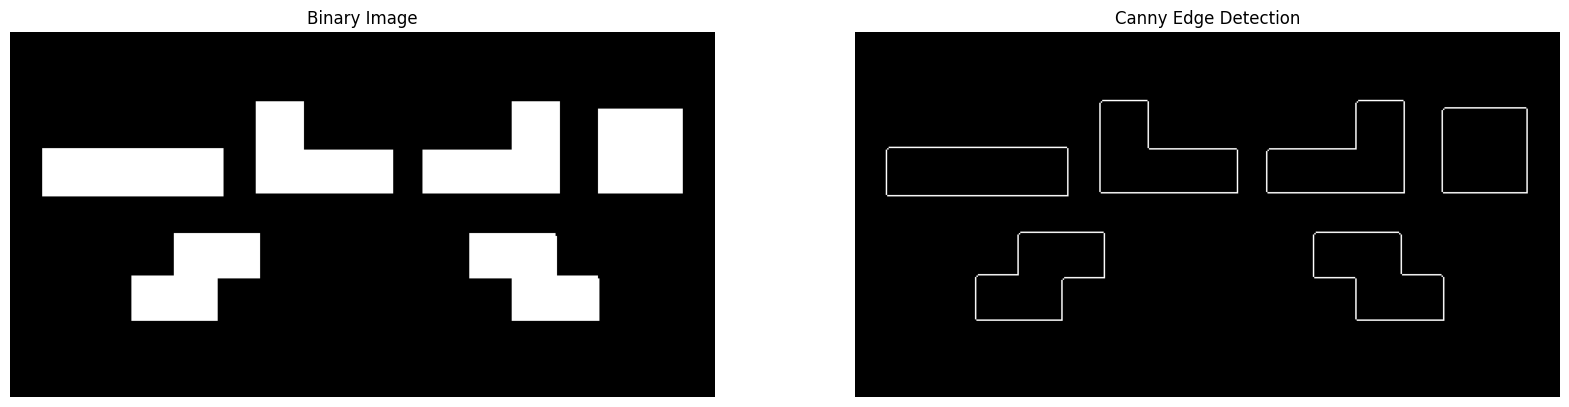

In [2]:
# Load and convert the image to grayscale
image = cv2.imread("blocks.jpg")
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Step 1: Apply simple Binary Thresholding (Inverse Binary Thresholding), since the background is white we use cv2.THRESH_BINARY_INV
_, binary = cv2.threshold(gray, 230, 255, cv2.THRESH_BINARY_INV)

# Step 2: Apply Canny Edge Detection
edges = cv2.Canny(binary, 100, 200)


# Display the images binary and edges
plt.figure(figsize=(20,10))

plt.subplot(1, 2, 1)
plt.imshow(binary, cmap="gray")
plt.title("Binary Image")
plt.axis("off")

plt.subplot(1, 2, 2)
plt.imshow(edges, cmap="gray")
plt.title("Canny Edge Detection")
plt.axis("off")

plt.show()

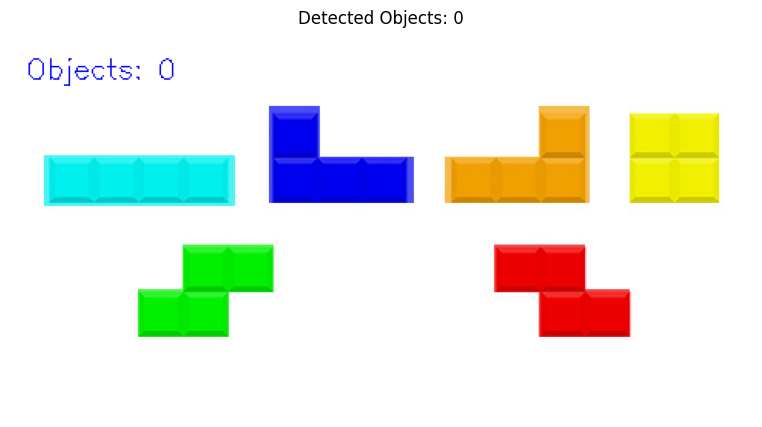

In [3]:
# Step 3: Find contours
contours, _ = cv2.findContours(edges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Step 4: Calculate centroids & Draw contours
num_objects = 0
output = image.copy()
for contour in contours:

    if len(contour) < 50:  # Skip small contours
        continue

    M = cv2.moments(contour)
    
    if M["m00"] != 0:  # Avoid division by zero
        cx = int(M["m10"] / M["m00"])
        cy = int(M["m01"] / M["m00"])
        
        # Draw centroid
        cv2.circle(output, (cx, cy), 3, (0, 0, 255), -1)

    num_objects += 1 # Increment the number of objects detected

    cv2.drawContours(output, [contour], -1, (0, 255, 0), 2)
    
# Step 5: Display the number of objects detected # Number of objects detected based on the number of contours
cv2.putText(output, f"Objects: {num_objects}", (10, 30), cv2.FONT_HERSHEY_SIMPLEX, 
            0.6, (255, 0, 0), 1)

# Display detected objects
plt.figure(figsize=(15,5))

plt.imshow(output[:,:,::-1])
plt.title(f"Detected Objects: {num_objects}")
plt.axis("off")

plt.show()
